In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [21]:
df_proba = pd.read_csv("df_probas.csv")
df_proba

,approved,rejected,target
0,0.451880,0.548120,1.0
1,0.905454,0.094546,0.0
2,0.715726,0.284274,0.0
3,0.597655,0.402345,0.0
4,0.738198,0.261802,0.0
...,...,...,...
291596,0.699497,0.300503,0.0
291597,0.705596,0.294404,0.0
291598,0.656117,0.343883,0.0
291599,0.607919,0.392081,1.0


In [51]:
def cout(data: pd.DataFrame, seuil: float):
    df = data.copy()
    df["prediction"] = np.where(df.approved > seuil, 0.0, 1.0)
    tp = df.loc[(df.prediction == 0) & (df.target == 0),:].shape[0]
    fp = df.loc[(df.prediction == 0) & (df.target == 1),:].shape[0]
    tn = df.loc[(df.prediction == 1) & (df.target == 1),:].shape[0]
    fn = df.loc[(df.prediction == 1) & (df.target == 0),:].shape[0]
    return 1*fp - 0.1*tp

In [52]:
couts = [cout(df_proba, seuil) for seuil in np.arange(0,1.01,0.01)]

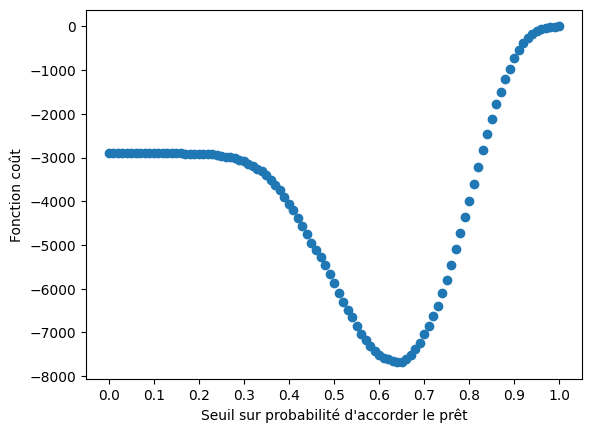

In [53]:
plt.scatter(np.arange(0,1.01,0.01), couts)
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel("Seuil sur probabilité d'accorder le prêt")
plt.ylabel("Fonction coût")
plt.show()